In [1]:
from gensim.models import FastText
from utils import load_reviews
import time
import numpy as np

In [2]:
time_start = time.time()

filePath = '../../corpus/6moods/train/usual_trainTrimed.csv'
labels, reviews = load_reviews(filePath)
reviews = [str(review).split() for review in reviews]

print(f'Loading reviews Coast {time.time()-time_start:.4f} Sec')
time_start = time.time()

model = FastText(reviews, vector_size=100, window=2, min_count=5, min_n=2, max_n=4, word_ngrams=1, epochs=10, workers=8)

print(f'Train Model Coast {time.time()-time_start:.4f} Sec')

Loading reviews Coast 0.0667 Sec
Train Model Coast 2.6864 Sec


In [3]:
# mood dict
m2i = {
    'sad':0,
    'angry': 1,
    'fear': 2,
    'neutral': 3,
    'surprise': 4,
    'happy': 5,
}
i2m = {k:i for k, i in enumerate(m2i)}
labels = [m2i[label] for label in labels]

In [40]:
vectors = [[model.wv[word] for word in review] for review in reviews]

In [43]:
zeros = [0 for i in range(100)]
for i in range(len(vectors)):
    while len(vectors[i]) < max_len:
        vectors[i].insert(0, zeros)
len(vectors), len(vectors[0]), len(vectors[0][0])

(27768, 80, 100)

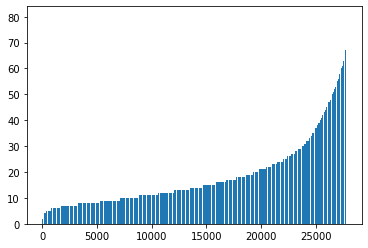

In [30]:
import matplotlib.pyplot as plt

lens = [len(vector) for vector in vectors]
lens.sort()
plt.bar(range(len(vectors)), lens)
plt.show()

In [23]:
max_len = max([len(vector) for vector in vectors])
max_len

80

In [44]:
vectors = np.array(vectors)

In [45]:
vectors.shape

(27768, 80, 100)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.01109874e+00 -2.88750827e-01 -7.06010312e-02 ...  4.64239046e-02
    1.13691926e-01 -2.39452153e-01]
  [ 5.06500721e-01 -7.72338867e-01  9.83960748e-01 ... -1.76274240e-01
   -6.47251487e-01 -5.05765021e-01]
  [ 5.40124059e-01 -5.53828061e-01  4.11283642e-01 ... -4.50358540e-01
   -4.22079153e-02  1.60758153e-01]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 3.93913299e-01  2.7

In [49]:
!pip list | grep gensim

gensim                            4.0.1
